# Homework 4 Solutions

In [308]:
import sys
sys.path.append('src/')
import numpy as np
import matplotlib.pyplot as plt
import kepler as kep
import coordinates as coord
import datetime

In [309]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

## Question 1

### Part a)

We have
$
r=\frac{h^2}{\mu}\frac{1}{1+e\cos(\nu)}
$

Taking a time derivative gives us

$
\dot{r}=\frac{h^2}{\mu}\frac{e\sin(\nu)\dot{\nu}}{(1+e\cos(\nu))^2}=\frac{h}{r}\frac{e\sin(\nu)}{1+e\cos(\nu)}=\frac{\mu}{h}e\sin(\nu)
$

We also know
$
\dot{\nu}=h/r^2
$

Now, we have the time derivatve of $x_{orb}$ as

$
\dot{x}_{orb}=\dot{r}\cos(\nu) - r\sin(\nu)\dot{\nu}
$

Plugging in our expressions for $\dot{r}$ and $\dot{\nu}$ gives us

$
\dot{x}_{orb}=\frac{\mu}{h}e\sin(\nu)\cos(\nu)-\frac{h}{r}\sin(\nu)=\frac{\mu}{h}e\sin(\nu)\cos(\nu)-\frac{\mu}{h}\sin(\nu)(1+e\cos(\nu))=-\frac{\mu}{h}\sin(\nu)
$

The time derivative of $y_{orb}$ is

$
\dot{y}_{orb}=\dot{r}\sin(\nu)+r\cos(\nu)\dot{\nu}
$

Once again, this can be evaluated to

$
\dot{y}_{orb}=\frac{\mu}{h}e\sin^2(\nu)+\frac{h}{r}\cos(\nu)=\frac{\mu}{h}e\sin^2(\nu)+\frac{\mu}{h}(1+e\cos(\nu))=\frac{\mu}{h}e(\sin^2(\nu)+\cos^2(\nu))+\frac{\mu}{h}\cos(\nu)=\frac{\mu}{h}(e+\cos(\nu))
$


### Part b)

The force on body $i$ in the N-body system is

$
m_i \ddot{\vec{r}}_i = \sum_{j=1,i \neq j}^{n} \frac{G m_i m_j (\vec{r}_j - \vec{r}_i)}{|\vec{r}_j-\vec{r}_i|^3}
$

For a system $S$ consisting of $n$ particles, the acceleration of the center of mass can be written as

$
m_S \ddot{\vec{r}}_{S_{cm}}=\sum_{i=1}^{n} m_i \ddot{\vec{r}}_i = \sum_{i=1}^{n} \sum_{j=1,i \neq j}^{n} \frac{G m_i m_j (\vec{r}_j - \vec{r}_i)}{|\vec{r}_j-\vec{r}_i|^3}
$

We can notice that for every $\vec{r}_j-\vec{r}_i$, there is a corresponding $\vec{r}_i-\vec{r}_j$ from the opposite body. Therefore, the entire expression goes to zero.

$
\ddot{\vec{r}}_{S_{cm}} = \vec{0}
$

This can also be shown using conservation of linear momentum, since each force is internal to system $S$. Finally, the position of the center of mass can be expressed as a function of time as

$
\vec{r}_{S_{cm}}(t) = \vec{v}_{S_{cm}}t + \vec{r}_{S_{cm},0}
$

## Question 2

### Part a)

In [310]:
mu_sun =  1.32712440018E11 # km^3/s^2
au_to_km = 1.496E8

a = np.array([0.3871, 0.7233, 1.0000, 1.5237, 5.2029, 9.5367, 19.1892, 30.0699]) * au_to_km
v = np.sqrt(mu_sun/a)
print(str(v) + " km/s")

[47.87165419 35.02118102 29.78447986 24.12905351 13.05771787  9.64474966
  6.79925901  5.43155308] km/s


### Part b)

Minimum velocity is at $\nu=180^{\circ}$.

$
r = a(1+e)(1-e)/(1-e) = a(1+e)
$

$
v_{min} = \sqrt{\mu(\frac{2}{a(1+e)}-\frac{1}{a})}=\sqrt{\mu(\frac{2}{a(1+e)}-\frac{1+e}{a(1+e)})}=\sqrt{\frac{\mu}{a}}\sqrt{\frac{1-e}{1+e}}=v_{circ}\sqrt{\frac{1-e}{1+e}}
$

Similarly, maximum velocity is at $\nu=0^{\circ}$.

$
r = a(1+e)(1-e)/(1+e) = a(1-e)
$

$
v_{max} = v_{circ}\sqrt{\frac{1+e}{1-e}}
$

### Part c)


In [311]:
r_earth = 6378 # km
mu_earth = 3.98600442E5 # km^3/s^2
r_peri = 400 + r_earth # km
r_api = 385000 # km

a_initial = r_peri
a_final = (r_peri + r_api) / 2
e_final = 1 - r_peri/a_final
v_initial = np.sqrt(mu_earth/a_initial)
v_circ = np.sqrt(mu_earth/a_final)
v_final = v_circ * np.sqrt((1+e_final)/(1-e_final))
dv = v_final - v_initial
print(dv)

3.0822302505706887


### Part d)

In [312]:
a_initial = (r_peri + r_api) / 2
e_initial = 1 - r_peri/a_initial
a_final = r_api
v_circ = np.sqrt(mu_earth/a_initial)
v_initial = v_circ * np.sqrt((1-e_initial)/(1+e_initial))
v_final = np.sqrt(mu_earth/a_final)
dv = v_final - v_initial

print(v_initial)
print(mu_earth)
print(v_final)
print(dv)

0.18927108898155307
398600.442
1.0175096183214305
0.8282385293398774


## Question 3

### Part a)

In [313]:
def elem2coord(a,e,i,w,W,M0,t0,t,mu):

    #% INPUTS
    #% a - semimajor axis
    #% e - eccentricity
    #% i - inclination
    #% w - argument of pericenter (pericenter is the same as periapsis)
    #% W - longitude of the accending nodes
    #% M0 - mean anomaly at time t0
    #% t0 - initial time
    #% t  - time
    #% mu  - gravitational constant (GM)

    #% OUTPUT
    #% x,y,z      - position
    #% vx, vy, vz - velocity
    
    n = np.sqrt(mu / a / a / a)
    M = M0 + n * (t - t0)

    # solving Kepler equation
    d = np.array(1.0)
    E = M + e * np.sin(M)
    eps = 1e-10
    while (d > eps).any():
        E1 = E
        E = E - (E - e * np.sin(E) - M) / (1 - e * np.cos(E))
        d = abs(E - E1)

    v = np.sqrt((1 + e) / (1 - e)) 
    v = 2 * np.arctan(v * np.tan(E / 2))

    u = w + v

    ax = np.cos(W) * np.cos(u) - np.sin(W) * np.sin(u) * np.cos(i)
    ay = np.sin(W) * np.cos(u) + np.cos(W) * np.sin(u) * np.cos(i)
    az = np.sin(u) * np.sin(i)
    
    r = a * (1 - e * np.cos(E))

    x = r * ax 
    y = r * ay 
    z = r * az

    axu = -np.cos(W) * np.sin(u) - np.sin(W) * np.cos(u) * np.cos(i)
    ayu = -np.sin(W) * np.sin(u) + np.cos(W) * np.cos(u) * np.cos(i)
    azu = np.cos(u) * np.sin(i)

    p = a * (1 - e * e)

    # velocities
    vx = np.sqrt(mu / p) * ((e * np.sin(v)) * ax + (1 + e * np.cos(v)) * axu)
    vy = np.sqrt(mu / p) * ((e * np.sin(v)) * ay + (1 + e * np.cos(v)) * ayu)
    vz = np.sqrt(mu / p) * ((e * np.sin(v)) * az + (1 + e * np.cos(v)) * azu)
    
    return x, y, z, vx, vy, vz

In [314]:
mu_earth = 398600.4418          # km^3/s^2
a = 26600                       # km, large semi-major axis
e = 0.74                        # high eccentricity
i = 63.4 * deg2rad              # critical inclination
w = 270.0 * deg2rad             # argument of perigee
W = 45.0 * deg2rad              # RAAN
M0 = 10  * deg2rad              # Mean anomaly at epoch
t0 = 100                        # seconds
t = t0 + 6 * 3600.0             # 6 hours after epoch

x, y, z, vx, vy, vz = elem2coord(a, e, i, w, W, M0, t0, t, mu_earth)

print("Position [km]:", x, y, z)
print("Velocity [km/s]:", vx, vy, vz)

Position [km]: -15891.749923216064 13329.971701149576 41262.81292841874
Velocity [km/s]: -0.9834914204373653 -1.1264374128032644 -0.20184826266167386


### Part b)

In [315]:
e = 0.74
w = 90 * deg2rad
T = 8 * 3600
a = ( (mu_earth * T**2)/(4*pi**2) )**(1/3)
n = np.sqrt(mu_earth/a**3)
i = 25 * deg2rad
Om = 40 * deg2rad

In [ ]:
def eci_to_ecef(gmst):
    return np.array([
        [np.cos(gmst), np.sin(gmst), 0],
        [-np.sin(gmst), np.cos(gmst), 0],
        [0, 0, 1]
    ])

In [317]:
# Set gmst = 0 at initial time
w_earth = 2*pi / 86400
tspan = np.linspace(0,86400,1000)
pos_eci = []
pos_ecef = []
lat = []
lon = []
for t in tspan:
    x,y,z,_,_,_ = elem2coord(a,e,i,w,Om,0,0,t,mu_earth)
    pos_eci += [np.array([x,y,z])]
    pos_ecef += [eci_to_ecef(t*w_earth) @ pos_eci[-1]]
    lat += [np.arctan(pos_ecef[-1][2]/np.sqrt(pos_ecef[-1][0]**2 + pos_ecef[-1][1]**2))]
    lon += [np.arctan2(pos_ecef[-1][1], pos_ecef[-1][0])]

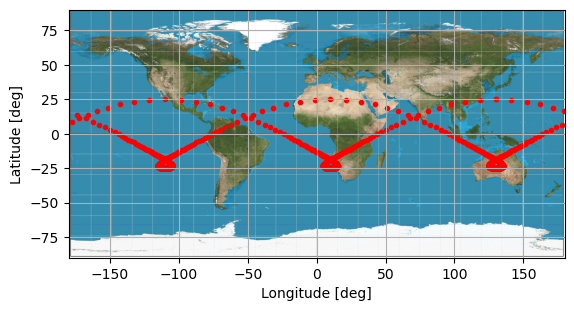

In [318]:
plt.figure()
plt.scatter(np.array(lon)*rad2deg, np.array(lat)*rad2deg,c='red',marker='.')
img = plt.imread("Earth.jpg")
plt.imshow(img,extent=[-180, 180, -90, 90])
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.grid()

### Part c)

In [319]:
def coord2elem(x, y, z, vx, vy, vz, mu):
    
    r = np.sqrt(x  **2  + y  ** 2 + z ** 2)
    v = np.sqrt(vx ** 2 + vy ** 2 + vz ** 2)
    
    h = (v ** 2) / 2 - mu / r
    
    c1 = y * vz - z * vy
    c2 = z * vx - x * vz
    c3 = x * vy - y * vx
    
    l1 = - mu * x / r + vy * c3 - vz * c2
    l2 = - mu * y / r + vz * c1 - vx * c3
    l3 = - mu * z / r + vx * c2 - vy * c1
    
    c = np.sqrt(c1 * c1 + c2 * c2 + c3 * c3)
    l = np.sqrt(l1 * l1 + l2 * l2 + l3 * l3)
    
    a = - mu / (2.0 * h)
    e = l / mu
    
    # getting inclination
    cosi = c3 / c
    sini = np.sqrt(1 - cosi ** 2)
    i    = np.arctan2(sini, cosi)
    
    # getting longitude of the ascending node
    W = np.arctan2(c1 / c /sini, -c2 / c / sini)
    
    # getting argument of the pericenter
    w = np.arctan2(l3 / l / sini, l1 / l * np.cos(W) + l2 / l * np.sin(W))
    
    # getting u
    u = np.arctan2(z / r / sini, x / r * np.cos(W) + y / r * np.sin(W))
    
    # getting true anomaly
    v = np.arctan2(np.sin(u) * np.cos(w) - np.cos(u) * np.sin(w), np.cos(u) * np.cos(w) + np.sin(u) * np.sin(w))
    
    # getting eccentric anomaly
    sinE = np.sqrt(1-e*e) * np.sin(v) / (1 + e * np.cos(v))
    cosE = (np.cos(v) + e) / (1 + e * np.cos(v))
    E = v + np.arctan((sinE * np.cos(v) - cosE * np.sin(v)) / (cosE * np.cos(v) + sinE * np.sin(v)))
    
    # getting mean anomaly
    M = E - e * np.sin(E)

    return (a, e, i, np.mod(w, 2*np.pi), np.mod(W, 2*np.pi), np.mod(M, 2*np.pi))

In [320]:
print(x)
print(y)
print(z)
print(vx)
print(vy)
print(vz)
print(mu_earth)
print("")
a, e, i, w, W, M = coord2elem(x, y, z, vx, vy, vz, mu_earth)

print(a)
print(e)
print(i)
print(w * rad2deg)
print(W * rad2deg)
print(M * rad2deg)

-3075.890667323619
3665.703753208355
2231.3923793888716
-0.9834914204373653
-1.1264374128032644
-0.20184826266167386
398600.4418

2680.38176101936
0.9710056763606778
0.43989457561531325
276.7162265333913
32.20938784482827
185.53214873126433


### Question 4

#### Part a)

In [321]:
tle1 = ["25544U", "98067A",   25133.44462271,  .00008689,  00000+0,  16281-3, 0,  9996]
tle2 = [51.6344, 119.1760, .0002307, 106.2285, 253.8958, 15.49506546509779]

In [322]:
def mjd_to_gmst(mjd):
    mjd_shifted = mjd -  51544.5
    return ((4.894960891 + (1.0027379093*(2*pi)*mjd_shifted)) + pi) % (2*pi) - pi

In [331]:
year = 2025
day = 133.44462271
date = datetime.datetime(year, 1, 1) + datetime.timedelta(day - 1)
jd0 = coord.gregorian2JD(date.month, date.day, date.year)
mjd0 = jd0 - 2400000.5

i = tle2[0] * deg2rad
Om = tle2[1] * deg2rad
e = tle2[2]
w = tle2[3] * deg2rad
M = tle2[4] * deg2rad
n = tle2[5] * 2*pi / 86400
a = (mu_earth / n**2)**(1/3)

print(i * rad2deg)
print(Om * rad2deg)
print(e)
print(w * rad2deg)
print(M * rad2deg)
print(n)
print(a)

51.6344
119.176
0.0002307
106.2285
253.8958
0.0011268329590750955
6796.305580476368


In [342]:
gmst0 = mjd_to_gmst(mjd0)
w_earth = 2*pi / 86400
tspan = np.linspace(0,86400,10000)
pos_eci = []
pos_ecef = []
lat = []
lon = []

x0,y0,z0,_,_,_ = elem2coord(a,e,i,w,Om,M,0,0,mu_earth)
pos_eci = [np.array([x0,y0,z0])]
pos_ecef = [eci_to_ecef(gmst0) @ pos_eci[-1]]
print(pos_eci)


for t in tspan:
    x,y,z,_,_,_ = elem2coord(a,e,i,w,Om,M,0,t,mu_earth)
    pos_eci += [np.array([x,y,z])]
    pos_ecef += [eci_to_ecef(gmst0 + t*w_earth) @ pos_eci[-1]]
    lat += [np.arctan(pos_ecef[-1][2]/np.sqrt(pos_ecef[-1][0]**2 + pos_ecef[-1][1]**2))]
    lon += [np.arctan2(pos_ecef[-1][1], pos_ecef[-1][0])]

[array([-3319.72336782,  5930.85474698,     9.19900269])]


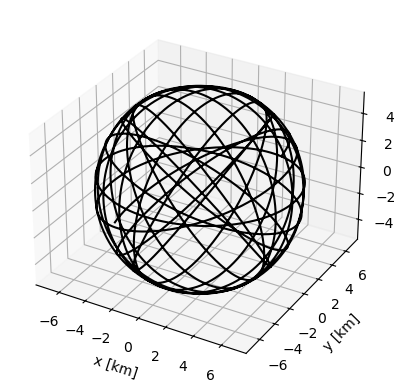

In [343]:
# creating figure 
fig = plt.figure() 
ax  = fig.add_subplot(projection='3d') 

# creating the plot 
plot_3D = ax.plot(np.array(pos_ecef)[:,0]/1e3, np.array(pos_ecef)[:,1]/1e3, np.array(pos_ecef)[:,2]/1e3,'-k',zorder=1)
  
# setting title and labels 
ax.set_xlabel('x [km]') 
ax.set_ylabel('y [km]') 
ax.set_zlabel('z [km]') 
# ax.set_box_aspect([1,1,1])
plt.axis('scaled')
# displaying the plot 
plt.show()

#### Part b)

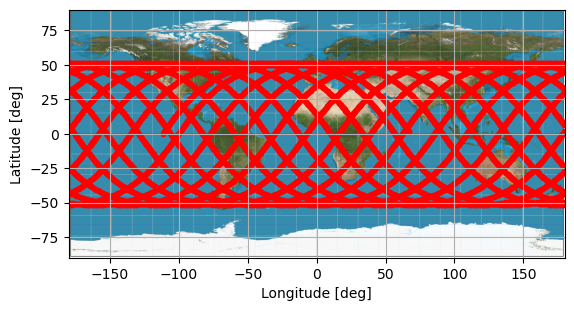

In [344]:
plt.figure()
plt.scatter(np.array(lon)*rad2deg, np.array(lat)*rad2deg,c='red',marker='.')
img = plt.imread("Earth.jpg")
plt.imshow(img,extent=[-180, 180, -90, 90])
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.grid()